# Importing Neceassary Libraries 

In [138]:
import re
import pandas as pd

# Loading the Whatsapp Chat file

In [139]:
with open("WhatsApp Chat with 🌚Busted minds🌝.txt",'r',encoding='utf-8') as f:
         data = f.read()

## There are two type of date-time format exported by whatsapp
### 1. 24hour format
### 2. 12 hour am-pm format

Hence we have to design the regex pattern accordingly for spliting messages & dates

In [140]:
# pattern = '\\d{1,2}/\\d{1,2}/\\d{2,4},\\s\\d{1,2}:\\d{2}\\s[AaPp][Mm]\\s-\\s' #am-pm format
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s' #24 hour format

### Splitting messages & dates using re

In [141]:
messages = re.split(pattern, data)[1:]

In [142]:
dates = re.findall(pattern, data)

In [143]:
len(messages),len(dates)

(10573, 10573)

### Creating DataFrame out of the Extracted messages & dates

In [144]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

In [145]:
df.shape

(10573, 2)

In [146]:
df.head()

,user_message,message_date
0,"Avantika Sharma created group ""☺12th A Maths S...","05/04/19, 18:17 -"
1,You were added\n,"05/04/19, 18:17 -"
2,"Om (Mom), Sakshi, Shejal Sharma and Tanu Singh...","05/06/20, 22:18 -"
3,"Yash Tiwari, +91 70674 19464, +91 88171 73564 ...","05/06/20, 22:18 -"
4,Aafreen Zoya added Harshita Sondhiya\n,"12/06/20, 07:40 -"


### Segregating user & messages into seperate columns in the dataframe

In [147]:
users = []
messages__ = []
for message in df['user_message']:
    entry = re.split('([\\w\\W]+?):\\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages__.append(entry[2])
    else:
        users.append('group_notification')
        messages__.append(entry[0])


In [148]:
df['user'] = users
df['message'] = messages__
df.drop(columns = ['user_message'],inplace=True)

In [149]:
df.head()

,message_date,user,message
0,"05/04/19, 18:17 -",group_notification,"Avantika Sharma created group ""☺12th A Maths S..."
1,"05/04/19, 18:17 -",group_notification,You were added\n
2,"05/06/20, 22:18 -",group_notification,"Om (Mom), Sakshi, Shejal Sharma and Tanu Singh..."
3,"05/06/20, 22:18 -",group_notification,"Yash Tiwari, +91 70674 19464, +91 88171 73564 ..."
4,"12/06/20, 07:40 -",group_notification,Aafreen Zoya added Harshita Sondhiya\n


### Coverting message_date into desired format
AMP-PM format is conerted to 24 hour format in this step & "-" is removed for 24 hour format
###### Uncomment the upper half of the code for am-pm format

In [150]:
#For am-pm fomrat
# date = []
# for i in df['message_date']:
#     req = i.split(" ")
#     _req = req[1].split(":")
#     if req[2] == 'pm' and _req[0]!="12":
#         _req[0] = str(int(_req[0] )+12)
#         _req = ":".join(_req)
#         req[1] = _req
#         req = " ".join(req[:-3])
#         date.append(req)
#     else:
#         req = " ".join(req[:-3])
#         date.append(req)
        
# df['date'] = date

#for 24 hour format
date = []
for i in df['message_date']:
    req = i.split(" ")[:-2]
    req = " ".join(req)
    date.append(req)
df['date'] = date    

    

In [151]:
df.head()

,message_date,user,message,date
0,"05/04/19, 18:17 -",group_notification,"Avantika Sharma created group ""☺12th A Maths S...","05/04/19, 18:17"
1,"05/04/19, 18:17 -",group_notification,You were added\n,"05/04/19, 18:17"
2,"05/06/20, 22:18 -",group_notification,"Om (Mom), Sakshi, Shejal Sharma and Tanu Singh...","05/06/20, 22:18"
3,"05/06/20, 22:18 -",group_notification,"Yash Tiwari, +91 70674 19464, +91 88171 73564 ...","05/06/20, 22:18"
4,"12/06/20, 07:40 -",group_notification,Aafreen Zoya added Harshita Sondhiya\n,"12/06/20, 07:40"


### Seperating Hour, Minutes, Year, Month, Date into Columns

In [152]:
#Defining a function that take month number as input & return month name
import datetime
def ret_month_name(inpt):
    monthinteger = int(inpt)
    month_name = datetime.date(1900, monthinteger, 1).strftime('%B')
    return month_name

In [153]:
df.rename(columns = {'date':'date_time'}, inplace = True)

In [154]:
year = []
month = []
month_num = []
date = []
hour = []
minutes = []
all_dates = list(df['date_time'].values)
for i in all_dates:
    temp = i.split(",")[0].split("/")
    _temp_ = i.split(",")[1].strip().split(":")
    date.append(temp[0])
    year.append("20"+temp[2])
    month.append(ret_month_name(temp[1]))
    month_num.append(temp[1])
    hour.append(_temp_[0])
    minutes.append(_temp_[1])


In [155]:
df['year'] = year
df['month'] = month
df['month_num'] = month_num
df['date'] = date
df['hour'] = hour
df['minutes'] = minutes

In [156]:
df.head() #This is how dataframe looks now!!

,message_date,user,message,date_time,year,month,month_num,date,hour,minutes
0,"05/04/19, 18:17 -",group_notification,"Avantika Sharma created group ""☺12th A Maths S...","05/04/19, 18:17",2019,April,04,05,18,17
1,"05/04/19, 18:17 -",group_notification,You were added\n,"05/04/19, 18:17",2019,April,04,05,18,17
2,"05/06/20, 22:18 -",group_notification,"Om (Mom), Sakshi, Shejal Sharma and Tanu Singh...","05/06/20, 22:18",2020,June,06,05,22,18
3,"05/06/20, 22:18 -",group_notification,"Yash Tiwari, +91 70674 19464, +91 88171 73564 ...","05/06/20, 22:18",2020,June,06,05,22,18
4,"12/06/20, 07:40 -",group_notification,Aafreen Zoya added Harshita Sondhiya\n,"12/06/20, 07:40",2020,June,06,12,07,40


# Finding Unique Users from the Chat

In [157]:
unique_users = list(df['user'].unique())
unique_users.remove("group_notification") #group_notification removed as it is not a user
unique_users.insert(0,'Overall') # Adding Overall as a user for getting overall analysis of the group

In [158]:
unique_users

['Overall',
 'Dinesh Mishra Sir',
 'Gaurav Bhai',
 'Prashashti Shukla',
 'Aafreen Zoya',
 'Harshita Sondhiya',
 'Manas Bhai',
 'Kritika Shah',
 'Mustafa Bhai',
 'Tanu Singh',
 'Akshat(Lallan) Bhai',
 'Shejal Sharma',
 'Upasna Sewte',
 'Sakshi',
 'Varun Bhai',
 'Sai Aditya M. B.',
 'Shikhar 6',
 'Om (Mom)',
 'Avantika Sharma',
 'Ashmita Das',
 'Khushi 😌😌',
 'Sadaf Fatima',
 'Sujal Bhai',
 'Ananya Sharma',
 'Nidhi 2',
 'SK Bhai',
 'Swastik 2',
 'Awantika Sharma',
 'Praveen Bhai',
 'Aditi Patel',
 '+91 77240 05501',
 'Kshitiz 2 Bhai',
 '+91 78800 06698',
 'Devodeep Sarkar',
 'Om Bhai 2']

# Extracting Statistics from the Chat

### Importing urlextract library for extarcting all the links shared in the chat

In [159]:
from urlextract import URLExtract
extractor = URLExtract()

### fetch_stats function return the statistics from the df given to the function on the basis of selected_user
If selected_user is "Overall" ==> Gives overall statistics of the chat  

If selected user is any specific name ==> Gives statstics of that person

In [160]:
def fetch_stats(selected_user,df):
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]
    #Total Messages
    num_messages = df.shape[0]
    #Total Word_count
    words = []
    for message in df['message']:
        words.extend(message.split())
    num_words = len(words)
    #Calculate Media messages
    media = df[df['message']=="<Media omitted>\n"]
    length_media = media.shape[0]
    #Calculate number of links
    links = []
    for message in df['message']:
        links.extend(extractor.find_urls(message))
    num_links = len(links)
    return num_messages,num_words,length_media,num_links


In [161]:
fetch_stats("Overall",df) # Change "Overall" to specific user as per your unique users

(10573, 30231, 3779, 22)

# Finding Busiest in a group(only for group)

In [162]:
busy_users = df[df['user']!='group_notification']['user'].value_counts().head() #top 5 busiest group in the group

### Plotting bar chart for these busy people against the number of messages sent by them

In [163]:
import matplotlib.pyplot as plt

In [164]:
x = busy_users.index
y = busy_users.values

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

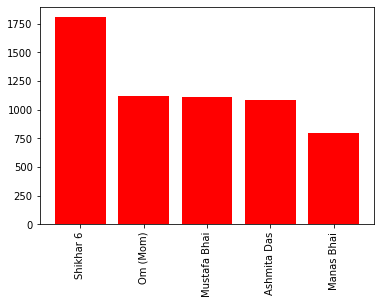

In [165]:
plt.bar(x,y,color='red')
plt.xticks(rotation='vertical')

#   WordCloud Creation

In [166]:
from wordcloud import WordCloud

### create_wordcloud function takes dataframe & selected user as input & return the wordcloud accordingly

In [167]:
def create_wordcloud(selected_user,df):
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]
    df = df[df['user']!='group_notification'] #removing group_notification messages
    df = df[df['message']!="<Media omitted>\n"] #removing media omitted messages
    #Removing Hinglish Stopwords
    with open("stop_hinglish.txt",'r') as f:
        data = f.read()
    stop_words = data.split("\n")
    def remove_stop_words(message):
        y = []
        for word in message.lower().split():
            if word not in data:
                y.append(word)
        return " ".join(y)
    df['message'] = df['message'].apply(remove_stop_words)
    wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')
    df_wc = wc.generate(df['message'].str.cat(sep = " "))
    return df_wc

### Creating Wordcloud for specific user

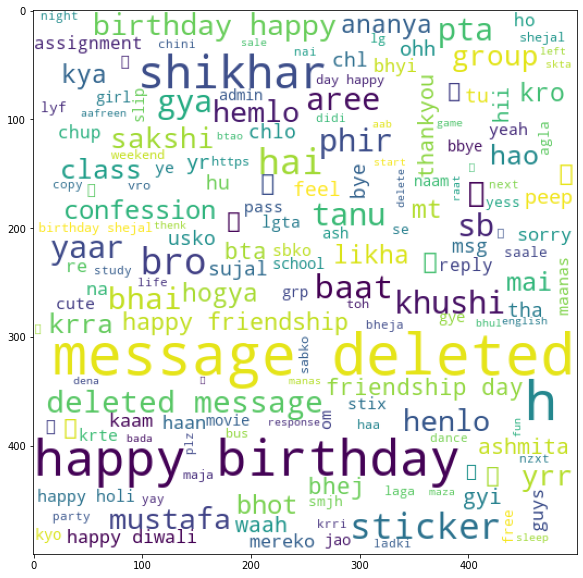

In [168]:
res = create_wordcloud("Overall",df)# Change "Overall" to specific user as per your unique users
plt.figure(figsize=(10, 10))
plt.imshow(res)

# Top 20 Words of the Chat

### common_words return the top 20 words of the chat by taking selected_user & dataframe as input
Overall ==> Top 20 words of the Overall Chat

Specific User's Name ==> Top 20 words of that specific user

In [169]:
from collections import Counter
def common_words(selected_user,df):
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]
    df = df[df['user']!='group_notification'] #removing group_notification messages
    df = df[df['message']!="<Media omitted>\n"] #removing media omitted messages
    with open("stop_hinglish.txt",'r') as f:
        data = f.read()
    data = data.split("\n")
    words = []
    for message in df['message']:
        for word in message.lower().split():
            if word not in data:
                words.append(word)
    frequency = Counter(words)
    return frequency.most_common(20)
    

In [170]:
CW = common_words('Overall',df)# Change "Overall" to specific user as per your unique users

In [171]:
CW

[('h', 378),
 ('😂', 258),
 ('😂😂', 235),
 ('happy', 177),
 ('message', 142),
 ('deleted', 138),
 ('😂😂😂', 126),
 ('birthday', 107),
 ('u', 74),
 ('🥲', 74),
 ('shikhar', 67),
 ('🤣', 57),
 ('haa', 57),
 ('@918839067058', 56),
 ('🤣🤣', 53),
 ('ni', 51),
 ('om', 49),
 ('😂😂😂😂', 47),
 ('kr', 47),
 ('baat', 41)]

In [172]:
cw_df = pd.DataFrame(CW)

### Plotting the Top 20 words as Horizontal Bar Chart

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

D:\All Applications\anaconda3\envs\deeplearning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\All Applications\anaconda3\envs\deeplearning\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


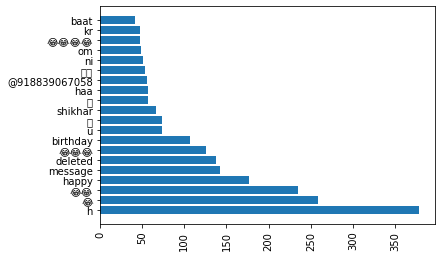

In [173]:
plt.barh(cw_df[0].values,cw_df[1].values)
plt.xticks(rotation="vertical")

# Emoji Analysis

### emojis library is very helful library for extracting emojis from string text

In [174]:
import emojis as emjs

### emoji_analysis returns all the emojis & their count for overall chat as well as for a specific user

In [175]:
def emoji_analysis(selected_user,df):
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]
    emojis = []
    for message in df['message']:
        emojis.extend(emjs.get(message))
    return pd.DataFrame(Counter(emojis).most_common(len(emojis)))

In [176]:
emj = emoji_analysis("Overall",df)# Change "Overall" to specific user as per your unique users

In [177]:
emj 

,0,1
0,😂,1386
1,🤣,393
2,🥲,342
3,🌝,192
4,🌚,179
...,...,...
209,🍾,1
210,🐭,1
211,💕,1
212,🐏,1


# Monthly Timeline Analysis

### Shows the variations in number of messages every month in the form of a graph & most busy months as Bar Plot 
##### Both Overall as well as for a specific user

In [178]:
def monthly_timeline_analysis(selected_user,df):
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]
    res = df.groupby(['year','month_num','month']).count()['message'].reset_index()
    _year_ = []
    for i in range(res.shape[0]):
        _year_.append(res['month'][i]+' - '+str(res['year'][i]))
    res['_year_'] = _year_
    plt.figure(0)
    plt.title("Monthly Message Count Variation")
    plt.plot(res['_year_'],res['message'],color='green')
    plt.xticks(rotation='vertical')
    plt.figure(1)
    plt.title("Most Busy Month")
    months_count = df['month'].value_counts()
    x = months_count.index
    y = months_count.values
    plt.bar(x,y)
    plt.xticks(rotation='vertical')

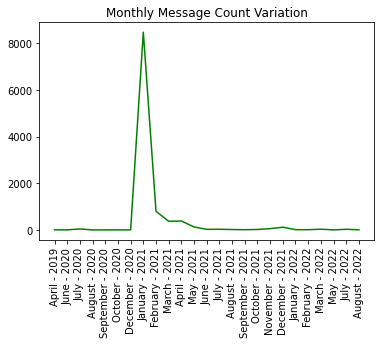

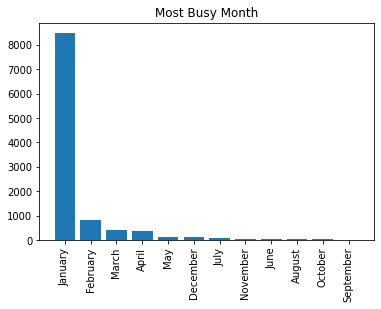

In [179]:
monthly_timeline_analysis('Overall',df)# Change "Overall" to specific user as per your unique users

In [180]:
df.head()

,message_date,user,message,date_time,year,month,month_num,date,hour,minutes
0,"05/04/19, 18:17 -",group_notification,"Avantika Sharma created group ""☺12th A Maths S...","05/04/19, 18:17",2019,April,04,05,18,17
1,"05/04/19, 18:17 -",group_notification,You were added\n,"05/04/19, 18:17",2019,April,04,05,18,17
2,"05/06/20, 22:18 -",group_notification,"Om (Mom), Sakshi, Shejal Sharma and Tanu Singh...","05/06/20, 22:18",2020,June,06,05,22,18
3,"05/06/20, 22:18 -",group_notification,"Yash Tiwari, +91 70674 19464, +91 88171 73564 ...","05/06/20, 22:18",2020,June,06,05,22,18
4,"12/06/20, 07:40 -",group_notification,Aafreen Zoya added Harshita Sondhiya\n,"12/06/20, 07:40",2020,June,06,12,07,40


# Day wise Analysis

### The following Code add day colum in the dataframe 

In [181]:
import calendar
days = []
for date in df['date_time']:
    date = date.split(",")[0]
    day = datetime.datetime.strptime(date, "%d/%m/%y")
    days.append(calendar.day_name[day.weekday()])
    
df['day'] = days

### days_timeline_analysis plots the variation of no.of messages on a particular day of the week as a bar plot
#### Both for Overall & Specific users

In [182]:
def days_timeline_analysis(selected_user,df):
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]
    days_count = df['day'].value_counts()
    x = days_count.index
    y = days_count.values
    plt.bar(x,y,color='orange')
    plt.xticks(rotation='vertical')

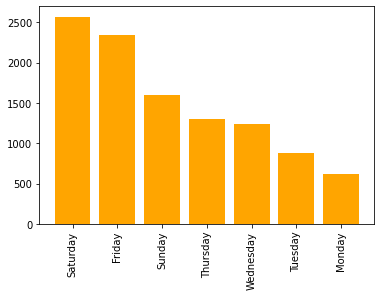

In [183]:
days_timeline_analysis('Overall',df)# Change "Overall" to specific user as per your unique users

# Hourly Analysis

### The following code adds a period column in the dataframe for ease in hourly analysis

In [184]:
period = []
for i in df['hour']:  
    if i == '23':
        period.append(i+" - "+"00")
    elif i == "0":
        period.append("00 - 01")
    else:
        if int(i)>8:
            period.append(i+" - "+str(int(i)+1))
        else:
            period.append(i+" - 0"+str(int(i)+1))
df['period'] = period

In [185]:
df.sample(5)

,message_date,user,message,date_time,year,month,month_num,date,hour,minutes,day,period
8035,"25/01/21, 11:40 -",Tanu Singh,<Media omitted>\n,"25/01/21, 11:40",2021,January,01,25,11,40,Monday,11 - 12
2318,"15/01/21, 11:00 -",Tanu Singh,<Media omitted>\n,"15/01/21, 11:00",2021,January,01,15,11,00,Friday,11 - 12
9914,"11/04/21, 19:26 -",Shikhar 6,Are kitne din baad🥲\n,"11/04/21, 19:26",2021,April,04,11,19,26,Sunday,19 - 20
2213,"15/01/21, 01:02 -",Shikhar 6,Me now\n,"15/01/21, 01:02",2021,January,01,15,01,02,Friday,01 - 02
5670,"17/01/21, 15:30 -",Sakshi,😂😂\n,"17/01/21, 15:30",2021,January,01,17,15,30,Sunday,15 - 16


### Plotting the HEATMAP for each hour of the day for all days of the week

In [186]:
import seaborn as sns
def hourly_analysis(selected_user,df):
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]
    plt.figure(figsize = (20,6))
    sns.heatmap(df.pivot_table(index='day',columns='period',values = 'message',aggfunc = 'count').fillna(0))
    plt.yticks(rotation='horizontal')

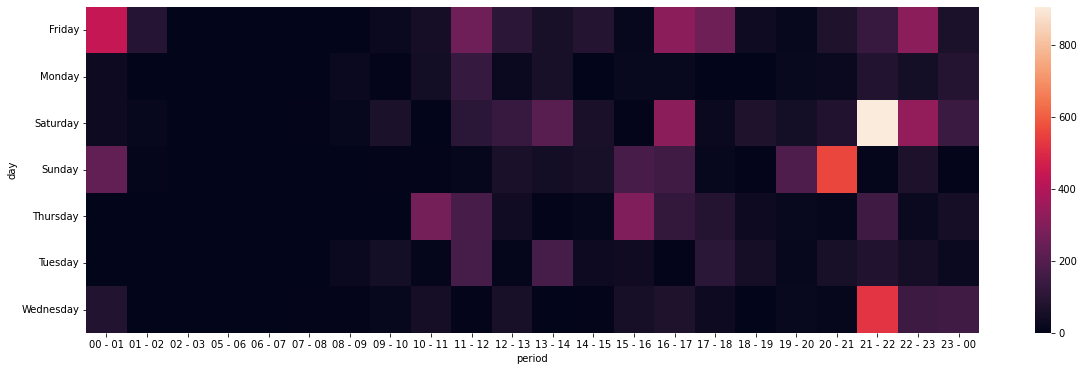

In [187]:
hourly_analysis('Overall',df)# Change "Overall" to specific user as per your unique users